# Data Cleaning

In [37]:
import pandas as pd
import numpy as np
import re

import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import stats

In [2]:
df=pd.read_csv('data.csv')
df

,Label (Grouping),Alabama!!Total!!Estimate,Alabama!!Total!!Margin of Error,Alabama!!Percent!!Estimate,Alabama!!Percent!!Margin of Error,Alabama!!Male!!Estimate,Alabama!!Male!!Margin of Error,Alabama!!Percent Male!!Estimate,Alabama!!Percent Male!!Margin of Error,Alabama!!Female!!Estimate,...,Puerto Rico!!Percent!!Estimate,Puerto Rico!!Percent!!Margin of Error,Puerto Rico!!Male!!Estimate,Puerto Rico!!Male!!Margin of Error,Puerto Rico!!Percent Male!!Estimate,Puerto Rico!!Percent Male!!Margin of Error,Puerto Rico!!Female!!Estimate,Puerto Rico!!Female!!Margin of Error,Puerto Rico!!Percent Female!!Estimate,Puerto Rico!!Percent Female!!Margin of Error
0,AGE BY EDUCATIONAL ATTAINMENT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Population 18 to 24 years,"488,344","±5,417",(X),(X),"245,043","±4,090",(X),(X),"243,301",...,(X),(X),"151,694","±2,147",(X),(X),"147,321","±2,056",(X),(X)
2,Less than high school graduate,"58,089","±4,934",11.9%,±1.0,"34,613","±3,501",14.1%,±1.4,"23,476",...,7.2%,±0.8,"12,355","±1,852",8.1%,±1.2,"9,180","±1,829",6.2%,±1.2
3,High school graduate (includes equival...,"176,620","±8,332",36.2%,±1.6,"98,665","±4,827",40.3%,±1.9,"77,955",...,28.7%,±1.5,"52,446","±3,422",34.6%,±2.2,"33,480","±3,097",22.7%,±2.1
4,Some college or associate's degree,"208,994","±8,746",42.8%,±1.8,"93,866","±4,989",38.3%,±1.9,"115,128",...,52.5%,±1.5,"74,609","±3,478",49.2%,±2.1,"82,322","±3,646",55.9%,±2.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,Less than high school graduate,"28,515","±1,683",(X),(X),"32,089","±1,079",(X),(X),"22,016",...,(X),(X),"13,178","±1,192",(X),(X),"10,864","±2,075",(X),(X)
64,High school graduate (includes equival...,"34,127","±1,153",(X),(X),"41,600",±795,(X),(X),"26,337",...,(X),(X),"17,022",±409,(X),(X),"13,232",±836,(X),(X)
65,Some college or associate's degree,"39,501",±944,(X),(X),"51,002","±1,153",(X),(X),"31,607",...,(X),(X),"22,270",±832,(X),(X),"17,092",±523,(X),(X)
66,Bachelor's degree,"56,640","±1,667",(X),(X),"71,465","±2,183",(X),(X),"46,955",...,(X),(X),"30,686","±1,752",(X),(X),"26,274",±752,(X),(X)


In [3]:
df.columns

Index(['Label (Grouping)', 'Alabama!!Total!!Estimate',
       'Alabama!!Total!!Margin of Error', 'Alabama!!Percent!!Estimate',
       'Alabama!!Percent!!Margin of Error', 'Alabama!!Male!!Estimate',
       'Alabama!!Male!!Margin of Error', 'Alabama!!Percent Male!!Estimate',
       'Alabama!!Percent Male!!Margin of Error', 'Alabama!!Female!!Estimate',
       ...
       'Puerto Rico!!Percent!!Estimate',
       'Puerto Rico!!Percent!!Margin of Error', 'Puerto Rico!!Male!!Estimate',
       'Puerto Rico!!Male!!Margin of Error',
       'Puerto Rico!!Percent Male!!Estimate',
       'Puerto Rico!!Percent Male!!Margin of Error',
       'Puerto Rico!!Female!!Estimate', 'Puerto Rico!!Female!!Margin of Error',
       'Puerto Rico!!Percent Female!!Estimate',
       'Puerto Rico!!Percent Female!!Margin of Error'],
      dtype='object', length=625)

In [4]:
'Estimate' in 'Alabama!!Percent!!Estimate'

True

In [5]:
total=[]
states=[]
for col in df.columns:
    if 'Total' in col and 'Estimate' in col:
        total.append(col)
        

In [6]:
educational_level=df[total]

In [7]:
educational_level.columns = [re.findall(r"^(.*?)(?=\!)", col)[0] for col in educational_level.columns]

In [8]:
educational_level=educational_level.transpose()

In [9]:
col_name=[]
for i in np.array(df['Label (Grouping)']):
    cleaned_string = re.sub(r'\xa0+|^ +| +$', '', i)
    col_name.append(cleaned_string)

In [10]:
educational_level.columns=col_name

In [11]:
educational_level=educational_level.drop(educational_level.columns[0], axis=1)

In [12]:
educational_level.columns

Index(['Population 18 to 24 years', 'Less than high school graduate',
       'High school graduate (includes equivalency)',
       'Some college or associate's degree', 'Bachelor's degree or higher',
       'Population 25 years and over', 'Less than 9th grade',
       '9th to 12th grade, no diploma',
       'High school graduate (includes equivalency)',
       'Some college, no degree', 'Associate's degree', 'Bachelor's degree',
       'Graduate or professional degree', 'High school graduate or higher',
       'Bachelor's degree or higher', 'Population 25 to 34 years',
       'High school graduate or higher', 'Bachelor's degree or higher',
       'Population 35 to 44 years', 'High school graduate or higher',
       'Bachelor's degree or higher', 'Population 45 to 64 years',
       'High school graduate or higher', 'Bachelor's degree or higher',
       'Population 65 years and over', 'High school graduate or higher',
       'Bachelor's degree or higher',
       'RACE AND HISPANIC OR LAT

In [13]:
educational_level = educational_level.loc[:, :'RACE AND HISPANIC OR LATINO ORIGIN BY EDUCATIONAL ATTAINMENT'].drop(educational_level.columns[-2:], axis=1)

In [14]:
educational_level

,Population 18 to 24 years,Less than high school graduate,High school graduate (includes equivalency),Some college or associate's degree,Bachelor's degree or higher,Population 25 years and over,Less than 9th grade,"9th to 12th grade, no diploma",High school graduate (includes equivalency),"Some college, no degree",...,Population 35 to 44 years,High school graduate or higher,Bachelor's degree or higher,Population 45 to 64 years,High school graduate or higher,Bachelor's degree or higher,Population 65 years and over,High school graduate or higher,Bachelor's degree or higher,RACE AND HISPANIC OR LATINO ORIGIN BY EDUCATIONAL ATTAINMENT
Alabama,"488,344","58,089","176,620","208,994","44,641","3,474,924","118,034","271,263","1,057,155","716,144",...,"632,416","562,939","202,288","1,277,343","1,132,566","365,267","913,013","790,146","236,624",NaN
Alaska,"68,620","7,801","33,068","22,097","5,654","489,218","10,950","21,719","142,455","116,078",...,"104,911","98,920","33,975","168,933","156,577","51,058","101,474","94,131","30,534",NaN
Arizona,"717,938","102,059","256,195","281,101","78,583","5,053,656","241,467","306,781","1,202,946","1,160,936",...,"926,470","818,205","323,779","1,726,541","1,517,145","558,646","1,381,954","1,244,972","448,159",NaN
Arkansas,"292,181","37,246","109,301","117,675","27,959","2,057,624","82,740","140,697","705,670","438,076",...,"387,640","349,937","116,022","745,265","655,777","178,560","538,842","470,509","121,339",NaN
California,"3,663,563","339,703","1,308,667","1,553,990","461,203","26,866,773","2,376,805","1,738,878","5,506,855","5,192,854",...,"5,395,388","4,650,072","2,198,152","9,568,024","7,798,413","3,310,766","6,158,902","5,036,014","2,075,419",NaN
Colorado,"544,827","59,947","187,892","212,694","84,294","4,084,004","114,089","170,479","823,109","762,179",...,"860,355","792,774","425,135","1,392,046","1,280,829","612,473","915,661","858,359","382,208",NaN
Connecticut,"350,593","33,078","99,270","150,389","67,856","2,545,188","100,376","115,659","660,047","405,693",...,"460,313","422,321","210,590","970,653","891,663","401,823","663,712","589,841","241,980",NaN
Delaware,"86,128","11,470","33,298","32,364","8,996","724,041","18,944","38,980","204,385","135,691",...,"125,307","114,063","50,585","255,991","236,022","88,168","212,180","194,953","73,696",NaN
District of Columbia,"68,328","4,435","13,678","28,522","21,693","479,231","10,203","20,152","64,543","55,085",...,"111,221","107,309","81,821","135,403","121,324","75,462","87,354","78,084","42,244",NaN
Florida,"1,845,519","229,379","638,736","754,968","222,436","16,104,410","679,435","943,495","4,363,609","2,955,638",...,"2,799,499","2,528,694","1,053,736","5,726,736","5,161,026","1,898,957","4,794,414","4,235,312","1,541,145",NaN


In [15]:
column_counts = {}
new_columns=[]
for column in educational_level.columns:
    if column in column_counts:
        column_counts[column] += 1
        new_column_name = f"{column}_{column_counts[column]}"
    else:
        column_counts[column] = 0
        new_column_name = column
    new_columns.append(new_column_name)

# Assign new column names to the DataFrame
educational_level.columns = new_columns

In [16]:
educational_level.columns

Index(['Population 18 to 24 years', 'Less than high school graduate',
       'High school graduate (includes equivalency)',
       'Some college or associate's degree', 'Bachelor's degree or higher',
       'Population 25 years and over', 'Less than 9th grade',
       '9th to 12th grade, no diploma',
       'High school graduate (includes equivalency)_1',
       'Some college, no degree', 'Associate's degree',
       'High school graduate or higher', 'Bachelor's degree or higher_1',
       'Population 25 to 34 years', 'High school graduate or higher_1',
       'Bachelor's degree or higher_2', 'Population 35 to 44 years',
       'High school graduate or higher_2', 'Bachelor's degree or higher_3',
       'Population 45 to 64 years', 'High school graduate or higher_3',
       'Bachelor's degree or higher_4', 'Population 65 years and over',
       'High school graduate or higher_4', 'Bachelor's degree or higher_5',
       'RACE AND HISPANIC OR LATINO ORIGIN BY EDUCATIONAL ATTAINMENT'],
   

In [17]:
cols=[]
for col in educational_level.columns:
    if 'years' not in col: 
        cols.append(col)

In [18]:
educational_level=educational_level[cols]
educational_level

,Less than high school graduate,High school graduate (includes equivalency),Some college or associate's degree,Bachelor's degree or higher,Less than 9th grade,"9th to 12th grade, no diploma",High school graduate (includes equivalency)_1,"Some college, no degree",Associate's degree,High school graduate or higher,Bachelor's degree or higher_1,High school graduate or higher_1,Bachelor's degree or higher_2,High school graduate or higher_2,Bachelor's degree or higher_3,High school graduate or higher_3,Bachelor's degree or higher_4,High school graduate or higher_4,Bachelor's degree or higher_5,RACE AND HISPANIC OR LATINO ORIGIN BY EDUCATIONAL ATTAINMENT
Alabama,"58,089","176,620","208,994","44,641","118,034","271,263","1,057,155","716,144","311,537","3,085,627","1,000,791","599,976","196,612","562,939","202,288","1,132,566","365,267","790,146","236,624",NaN
Alaska,"7,801","33,068","22,097","5,654","10,950","21,719","142,455","116,078","48,370","456,549","149,646","106,921","34,079","98,920","33,975","156,577","51,058","94,131","30,534",NaN
Arizona,"102,059","256,195","281,101","78,583","241,467","306,781","1,202,946","1,160,936","475,387","4,505,408","1,666,139","925,086","335,555","818,205","323,779","1,517,145","558,646","1,244,972","448,159",NaN
Arkansas,"37,246","109,301","117,675","27,959","82,740","140,697","705,670","438,076","167,634","1,834,187","522,807","357,964","106,886","349,937","116,022","655,777","178,560","470,509","121,339",NaN
California,"339,703","1,308,667","1,553,990","461,203","2,376,805","1,738,878","5,506,855","5,192,854","2,115,440","22,751,090","9,935,941","5,266,591","2,351,604","4,650,072","2,198,152","7,798,413","3,310,766","5,036,014","2,075,419",NaN
Colorado,"59,947","187,892","212,694","84,294","114,089","170,479","823,109","762,179","339,016","3,799,436","1,875,132","867,474","455,316","792,774","425,135","1,280,829","612,473","858,359","382,208",NaN
Connecticut,"33,078","99,270","150,389","67,856","100,376","115,659","660,047","405,693","197,009","2,329,153","1,066,404","425,328","212,011","422,321","210,590","891,663","401,823","589,841","241,980",NaN
Delaware,"11,470","33,298","32,364","8,996","18,944","38,980","204,385","135,691","61,657","666,117","264,384","121,079","51,935","114,063","50,585","236,022","88,168","194,953","73,696",NaN
District of Columbia,"4,435","13,678","28,522","21,693","10,203","20,152","64,543","55,085","15,974","448,876","313,274","142,159","113,747","107,309","81,821","121,324","75,462","78,084","42,244",NaN
Florida,"229,379","638,736","754,968","222,436","679,435","943,495","4,363,609","2,955,638","1,643,815","14,481,480","5,518,418","2,556,448","1,024,580","2,528,694","1,053,736","5,161,026","1,898,957","4,235,312","1,541,145",NaN


In [19]:
educational_level = educational_level.replace(',', '', regex=True).astype(float)
educational_level.fillna(0, inplace=True)
less_than_high_school=np.array([])
high_school=np.array([])
bachelor_or_higher=np.array([])
some_college=np.array([])

In [20]:
less_than_high_school=np.zeros(52)
high_school=np.zeros(52)
bachelor_or_higher=np.zeros(52)
some_college=np.zeros(52)

In [21]:
for i in educational_level.columns:
    col_name=i.lower()
    print(i)
    if col_name.startswith("less"):
        less_than_high_school+= np.array(educational_level[i])
    elif col_name.startswith("high") or col_name.startswith("9th"):
        high_school+=np.array(educational_level[i])
    elif col_name.startswith("bachelor's"):
        bachelor_or_higher+= np.array(educational_level[i])
    else:
        some_college += np.array(educational_level[i])

Less than high school graduate
High school graduate (includes equivalency)
Some college or associate's degree
Bachelor's degree or higher
Less than 9th grade
9th to 12th grade, no diploma
High school graduate (includes equivalency)_1
Some college, no degree
Associate's degree
High school graduate or higher
Bachelor's degree or higher_1
High school graduate or higher_1
Bachelor's degree or higher_2
High school graduate or higher_2
Bachelor's degree or higher_3
High school graduate or higher_3
Bachelor's degree or higher_4
High school graduate or higher_4
Bachelor's degree or higher_5
RACE AND HISPANIC OR LATINO ORIGIN BY EDUCATIONAL ATTAINMENT


In [22]:
educational_level['some_college']=some_college
educational_level['less_than_high_school']=less_than_high_school
educational_level['high_school']=high_school
educational_level['bachelor_or_higher']=bachelor_or_higher

In [23]:
educational_level=educational_level[['less_than_high_school','high_school','some_college','bachelor_or_higher']]

In [24]:
educational_level=educational_level.astype(int)
educational_level

,less_than_high_school,high_school,some_college,bachelor_or_higher
Alabama,176123,7676292,1236675,2046223
Alaska,18751,1110340,186545,304946
Arizona,343526,10776738,1917424,3410861
Arkansas,119986,4624042,723385,1073573
California,2716508,54056580,8862284,20333085
Colorado,174036,8780352,1313889,3834558
Connecticut,133454,5533282,753091,2200664
Delaware,30414,1608897,229712,537764
District of Columbia,14638,996125,99581,648241
Florida,908814,34908800,5354421,11259272


In [25]:
educational_level = educational_level.drop(columns=['less_than_high_school', 'high_school', 'some_college'])

# Exploratory Data Analysis

In [26]:
# Read employment dataframe
df = pd.read_csv('employment.csv')

In [27]:
# Remove unecessary Columns
total_employment = df.drop(columns=['12-month percent change in employment', '12-month net change in employment (thousands)'])

In [28]:
# Display the first few rows to verify
total_employment.head()

,State,Total employment (thousands)
0,Alabama,"2,169.2"
1,Alaska,329.9
2,Arizona,"3,189.3"
3,Arkansas,"1,362.6"
4,California,"18,180.7"


In [29]:
# Function to standardize the values of the total employment column
def standardize(s):
    if ',' in s:
        s=s.replace(',', '')
    s=float(s)*1000
    return s

In [30]:
# Rename the column
total_employment.rename(columns = {'Total employment (thousands)': 'Total employment'}, inplace=True)

In [31]:
# Apply the standardize function to the entire column
total_employment['Total employment'] = total_employment['Total employment'].apply(standardize)
total_employment.head()

,State,Total employment
0,Alabama,2169200.0
1,Alaska,329900.0
2,Arizona,3189300.0
3,Arkansas,1362600.0
4,California,18180700.0


In [32]:
educational_level['State'] = np.array(total_employment['State'])
educational_level

,bachelor_or_higher,State
Alabama,2046223,Alabama
Alaska,304946,Alaska
Arizona,3410861,Arizona
Arkansas,1073573,Arkansas
California,20333085,California
Colorado,3834558,Colorado
Connecticut,2200664,Connecticut
Delaware,537764,Delaware
District of Columbia,648241,District of Columbia
Florida,11259272,Florida


In [33]:
combined_data = pd.merge(educational_level, total_employment, on='State')
combined_data

,bachelor_or_higher,State,Total employment
0,2046223,Alabama,2169200.0
1,304946,Alaska,329900.0
2,3410861,Arizona,3189300.0
3,1073573,Arkansas,1362600.0
4,20333085,California,18180700.0
5,3834558,Colorado,2914000.0
6,2200664,Connecticut,1695800.0
7,537764,Delaware,486400.0
8,648241,District of Columbia,780200.0
9,11259272,Florida,9860700.0


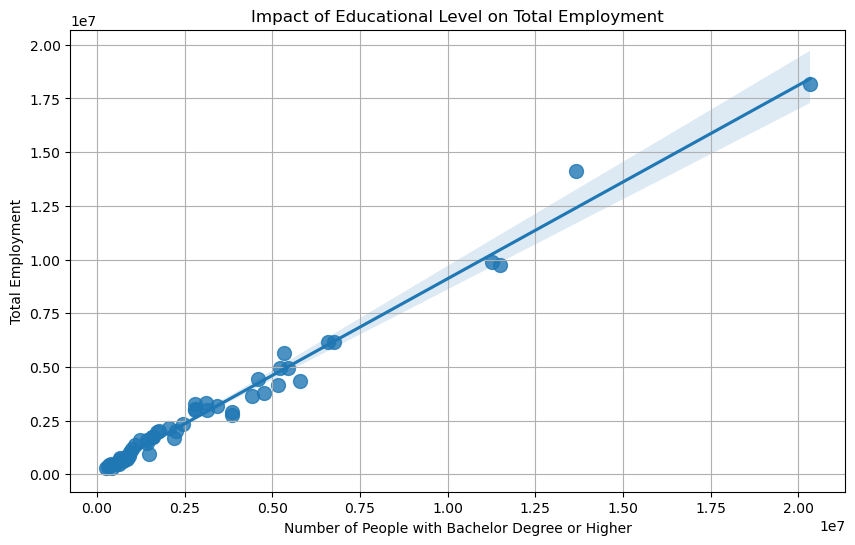

In [36]:
# Plotting the scatter plot for educational level vs total employment
plt.figure(figsize=(10, 6))
sns.regplot(data=combined_data, x='bachelor_or_higher', y='Total employment', scatter_kws={'s': 100})
plt.title('Impact of Educational Level on Total Employment')
plt.xlabel('Number of People with Bachelor Degree or Higher')
plt.ylabel('Total Employment')
plt.grid(True)
plt.show()

The regression line has a positive slope, which indicates a positive linear relationship between the number of people with a bachelor's degree or higher and total employment. This suggests that as the number of people with higher education increases, total employment also tends to be higher. And the data points are clustered close to the regression line, suggesting a strong relationship between the two variables.